# Creating Confusion Matrix and ROC Curve

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
#George Code below
df= pd.read_csv('sample.csv')
df.dropna()
df.head()

,FRD_IND,APPRD_AUTHZN_CNT,AVG_DLY_AUTHZN_AMT,MRCH_CATG_CD,POS_ENTRY_MTHD_CD,RCURG_AUTHZN_IND,DISTANCE_FROM_HOME,ACCT_CURR_BAL,AUTHZN_AMT,AUTHZN_OUTSTD_AMT,PLSTC_ISU_DUR
0,0,3,7,5812,90,0,0.000000,2498.21,15.52,94.28,805
1,0,1,6,5541,90,0,0.000000,88.88,46.56,56.31,68
2,0,4,0,5965,81,0,358.850300,1934.36,16.34,927.13,190
3,0,0,3,5542,90,0,4.293625,916.04,1.00,0.00,217
4,0,1,2,5814,90,0,509.830350,166.62,10.66,10.66,110


In [3]:
df.columns

Index(['FRD_IND', 'APPRD_AUTHZN_CNT', 'AVG_DLY_AUTHZN_AMT', 'MRCH_CATG_CD',
       'POS_ENTRY_MTHD_CD', 'RCURG_AUTHZN_IND', 'DISTANCE_FROM_HOME',
       'ACCT_CURR_BAL', 'AUTHZN_AMT', 'AUTHZN_OUTSTD_AMT', 'PLSTC_ISU_DUR'],
      dtype='object')

### Training Testing Split

In [4]:
y_col, x_col = df.columns[0], df.columns[1::]
x_train, x_test, y_train, y_test = train_test_split(df[x_col], df[y_col], test_size = 0.20, random_state = 444)

clf = svm.LinearSVC(max_iter = 500)

In [5]:
x_train.head()

,APPRD_AUTHZN_CNT,AVG_DLY_AUTHZN_AMT,MRCH_CATG_CD,POS_ENTRY_MTHD_CD,RCURG_AUTHZN_IND,DISTANCE_FROM_HOME,ACCT_CURR_BAL,AUTHZN_AMT,AUTHZN_OUTSTD_AMT,PLSTC_ISU_DUR
695527,0,0,3063,1,0,346.780330,0.00,0.00,0.00,123
110525,3,6,6011,2,0,17.270464,232.82,63.00,317.97,642
1910345,1,1,5812,90,0,15.674769,282.81,4.33,4.33,284
1052733,1,2,5812,90,0,22.744324,411.73,5.02,5.02,464
820788,1,3,5812,90,0,53.759247,3664.23,34.12,35.12,397


In [8]:
#fit and create score for the training and testing values
clf.fit(x_train, y_train) # takes about 2-3 minutes to fit or 4 if saver on
clf.score(x_test ,y_test)


y_pred=clf.predict(x_test) #to create a y predict parameter for metrics


C:\Users\george\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
np.sum(y_test), np.sum(y_train), np.sum(y_pred) #returns: (485, 2005, 1)


(485, 2005, 19)

### Accuracy Score, Confusion Matrix, and  ROC Curve

In [23]:
clfModels = []
clfModels.append(clf)

#### F1 and Accuracy Score Function

In [24]:
def accuracyAndF1_scores(y_pred, y_test):
    accuracyScore = sklearn.metrics.accuracy_score(y_pred, y_test)
    print('Accuracy Score: ' + str(accuracyScore*100))
    f1Score = sklearn.metrics.f1_score(y_test, y_pred)
    print('F1 Score: ' + str(f1Score))

In [25]:
accuracyAndF1_scores(y_pred, y_test)

Accuracy Score of: 99.87336715234385
F1 Score of: 0.0


#### Raw Confusion Matrix

In [26]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[397497     19]
 [   485      0]]


#### Function to Visualize Confusion Matrix: Creates a Heatmap Confusion Matrix to Improve Visability  # (Needs Editing) !

In [27]:
def plot(y_test, y_pred): # Need to edit to include other plots like a time series plot of classified frauds vs all frauds, and a bar diagram comparing accuracy of the different models, etc.
    labels = unique_labels(y_test)
    columns = [f'Predicted{label}' for label in labels]
    index = [f'Predicted{label}' for label in labels]
    table = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_pred), columns = columns, index = index)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'viridis')

In [28]:
plot(y_test, y_pred)

<AxesSubplot:>

#### ROC Curve Function

In [29]:
#ROC CURVE
br = "\n" 
falseP, trueP, roc = sklearn.metrics.roc_curve(y_test,y_pred)#false positive, true positive, rocCurve
# print(f"ROC Curve Metrics:{br}True Postivies: {trueP}{br}False Positives: {falseP}{br}Bounds (I think):{roc}{br}")
#return confMx, falseP, trueP, rocCurve

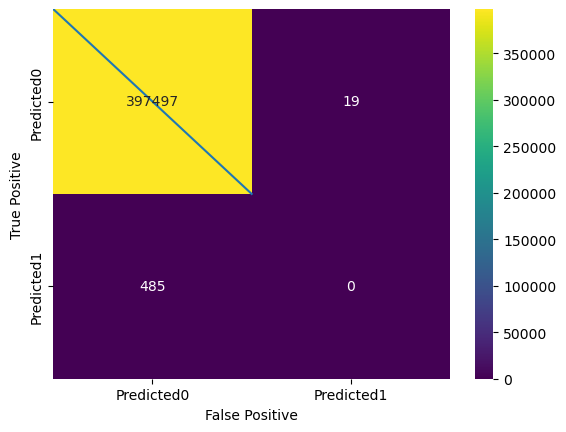

In [30]:
# Visualize the ROC curve using plotly express
def rocGraph(y_test,y_predictions):
    rocGraph.y_test = y_test 
    rocGraph.y_pred = y_predictions

    
    falseP, trueP, curve= sklearn.metrics.roc_curve(y_test,y_pred)#false positive, true positive, rocCurve
   
    plt.plot(falseP, trueP)
    plt.ylabel("True Positive")
    plt.xlabel("False Positive")
    plt.show()


rocGraph(y_test,y_pred)


### Analysis Using Different Models

### Logistic Regression

In [55]:
def log_reg(x_train, y_train):
    clf2 = LogisticRegression(max_iter = 500)
    clf2.fit(x_train, y_train)
#     print("Logistic Regression model accuracy: ", 100 * clf2.score(x_test, y_test))
    global y_pred2
    y_pred2 = clf2.predict(x_test)
    return y_pred2

In [ ]:
log_reg(x_train, y_train)
accuracyAndF1_scores(y_pred2, y_test)
clfModels.append(log_reg)

In [38]:
plot(y_test, y_pred2)

<AxesSubplot:>

### Decision Tree

In [39]:
def decisiontree(x_train, y_train):
    clf3 = DecisionTreeClassifier(max_depth = 3) #, random_state = 444) #takes a few minutes to run # could also edit max_depth
    clf3.fit(x_train, y_train)
#     print("Decision Tree model accuracy: ", 100 * clf3.score(x_test, y_test))
    global y_pred3
    y_pred3 = clf3.predict(x_test)
    return y_pred3

In [54]:
decisiontree(x_train, y_train)
accuracyAndF1_scores(y_pred3, y_test)
clfModels.append(decisiontree)

Decision Tree model accuracy:  99.8791460322964
Accuracy Score of: 99.8791460322964
F1 Score of: 0.02434077079107505


In [41]:
plot(y_test, y_pred3)

<AxesSubplot:>

### Random Forest

In [50]:
def randomforest(x_train, y_train):
    clf4 = RandomForestClassifier(max_depth = 3) #, random_state = 444) #takes about 5 minutes to run
    clf4.fit(x_train, y_train)
#     print("Random Forest model accuracy: ", 100 * clf4.score(x_test, y_test))
    global y_pred4
    y_pred4 = clf4.predict(x_test)
#     plot(y_test, y_pred4)
    return y_pred4
    

In [51]:
randomforest(x_train, y_train)
accuracyAndF1_scores(y_pred4, y_test)
clfModels.append(randomforest)

Random Forest model accuracy:  99.87814100969595


In [44]:
plot(y_test, y_pred4)

<AxesSubplot:>

In [ ]:
# clf4 = RandomForestClassifier(max_depth = 3)

In [ ]:
# clf4.fit(x_train, y_train)

In [ ]:
# clf4.score(x_test, y_test)

In [ ]:
# y_pred4 = clf4.predict(x_test)

In [ ]:
# clfModels.append(clf4)

## Comparison of Confusion Matrices

### Linear Support Vector Classification

In [46]:
# plot(y_test, y_pred)  # Definitely need to edit the plot func.

### Logistic Regression Classifier

In [47]:
# plot(y_test, y_pred2)

### Decision Tree Classifier

In [48]:
# plot(y_test, y_pred3)

### Random Forest Classifier

In [2]:
# plot(y_test, y_pred4)

## ROC Curve Comparison

In [1]:
# roc_curve(clfModels)